In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA

crime_data = pd.read_csv('ipc.csv')

In [2]:
crime_data.shape

(15264, 8)

In [3]:
crime_data.info

<bound method DataFrame.info of       Country                                         State  \
0       India                   Andaman And Nicobar Islands   
1       India                   Andaman And Nicobar Islands   
2       India                   Andaman And Nicobar Islands   
3       India                   Andaman And Nicobar Islands   
4       India                   Andaman And Nicobar Islands   
...       ...                                           ...   
15259   India  The Dadra And Nagar Haveli And Daman And Diu   
15260   India  The Dadra And Nagar Haveli And Daman And Diu   
15261   India                                     Telangana   
15262   India                                     Rajasthan   
15263   India                                Madhya Pradesh   

                                  Year  \
0      Calendar Year (Jan - Dec), 2018   
1      Calendar Year (Jan - Dec), 2018   
2      Calendar Year (Jan - Dec), 2018   
3      Calendar Year (Jan - Dec), 2018   
4

In [4]:
crime_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Incidence Of Ipc ( Indian Penal Code ) Crimes (UOM:Number),15264.0,2561.056014,17799.575447,0.0,0.0,17.0,325.0,891700.0
Victims Of Ipc ( Indian Penal Code ) Crimes (UOM:Number),15156.0,2593.549485,16408.689268,0.0,0.0,18.0,347.5,633219.0
Ipc ( Indian Penal Code ) Crime Rate Per Lakh Person (UOM:PerLakh(100000)),15264.0,6.625909,40.330221,0.0,0.0,0.2,2.5,1501.9


In [5]:
crime_data.isnull().sum()/crime_data.shape[0]

Country                                                                       0.000000
State                                                                         0.000000
Year                                                                          0.000000
Crime Head Ipc ( Indian Penal Code ) Category                                 0.000000
Crime Head Ipc ( Indian Penal Code ) Sub-Category                             0.009434
Incidence Of Ipc ( Indian Penal Code ) Crimes (UOM:Number)                    0.000000
Victims Of Ipc ( Indian Penal Code ) Crimes (UOM:Number)                      0.007075
Ipc ( Indian Penal Code ) Crime Rate Per Lakh Person (UOM:PerLakh(100000))    0.000000
dtype: float64

In [6]:
# Fill missing values using linear interpolation
crime_data.interpolate(method='linear', inplace=True)

# Fill any remaining missing values with median of the group (State, Year)
crime_data.fillna(crime_data.groupby(['State', 'Year']).transform('median'), inplace=True)


C:\Users\ME\AppData\Local\Temp\ipykernel_3752\1228193675.py:5: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the function.
  crime_data.fillna(crime_data.groupby(['State', 'Year']).transform('median'), inplace=True)


In [7]:
crime_data.isnull().sum()/crime_data.shape[0]

Country                                                                       0.000000
State                                                                         0.000000
Year                                                                          0.000000
Crime Head Ipc ( Indian Penal Code ) Category                                 0.000000
Crime Head Ipc ( Indian Penal Code ) Sub-Category                             0.009434
Incidence Of Ipc ( Indian Penal Code ) Crimes (UOM:Number)                    0.000000
Victims Of Ipc ( Indian Penal Code ) Crimes (UOM:Number)                      0.000000
Ipc ( Indian Penal Code ) Crime Rate Per Lakh Person (UOM:PerLakh(100000))    0.000000
dtype: float64

In [8]:
# Descriptive statistics
descriptive_stats = crime_data.describe()
print(descriptive_stats)

       Incidence Of Ipc ( Indian Penal Code ) Crimes (UOM:Number)  \
count                                       15264.000000            
mean                                         2561.056014            
std                                         17799.575447            
min                                             0.000000            
25%                                             0.000000            
50%                                            17.000000            
75%                                           325.000000            
max                                        891700.000000            

       Victims Of Ipc ( Indian Penal Code ) Crimes (UOM:Number)  \
count                                       15264.000000          
mean                                         2594.303226          
std                                         16379.058754          
min                                             0.000000          
25%                                        

In [9]:
# Summary statistics for numerical columns
print(crime_data[['Incidence Of Ipc ( Indian Penal Code ) Crimes (UOM:Number)', 
                  'Victims Of Ipc ( Indian Penal Code ) Crimes (UOM:Number)',
                  'Ipc ( Indian Penal Code ) Crime Rate Per Lakh Person (UOM:PerLakh(100000))']].describe().T)


                                                      count         mean  \
Incidence Of Ipc ( Indian Penal Code ) Crimes (...  15264.0  2561.056014   
Victims Of Ipc ( Indian Penal Code ) Crimes (UO...  15264.0  2594.303226   
Ipc ( Indian Penal Code ) Crime Rate Per Lakh P...  15264.0     6.625909   

                                                             std  min  25%  \
Incidence Of Ipc ( Indian Penal Code ) Crimes (...  17799.575447  0.0  0.0   
Victims Of Ipc ( Indian Penal Code ) Crimes (UO...  16379.058754  0.0  0.0   
Ipc ( Indian Penal Code ) Crime Rate Per Lakh P...     40.330221  0.0  0.0   

                                                     50%    75%       max  
Incidence Of Ipc ( Indian Penal Code ) Crimes (...  17.0  325.0  891700.0  
Victims Of Ipc ( Indian Penal Code ) Crimes (UO...  18.0  353.0  633219.0  
Ipc ( Indian Penal Code ) Crime Rate Per Lakh P...   0.2    2.5    1501.9  


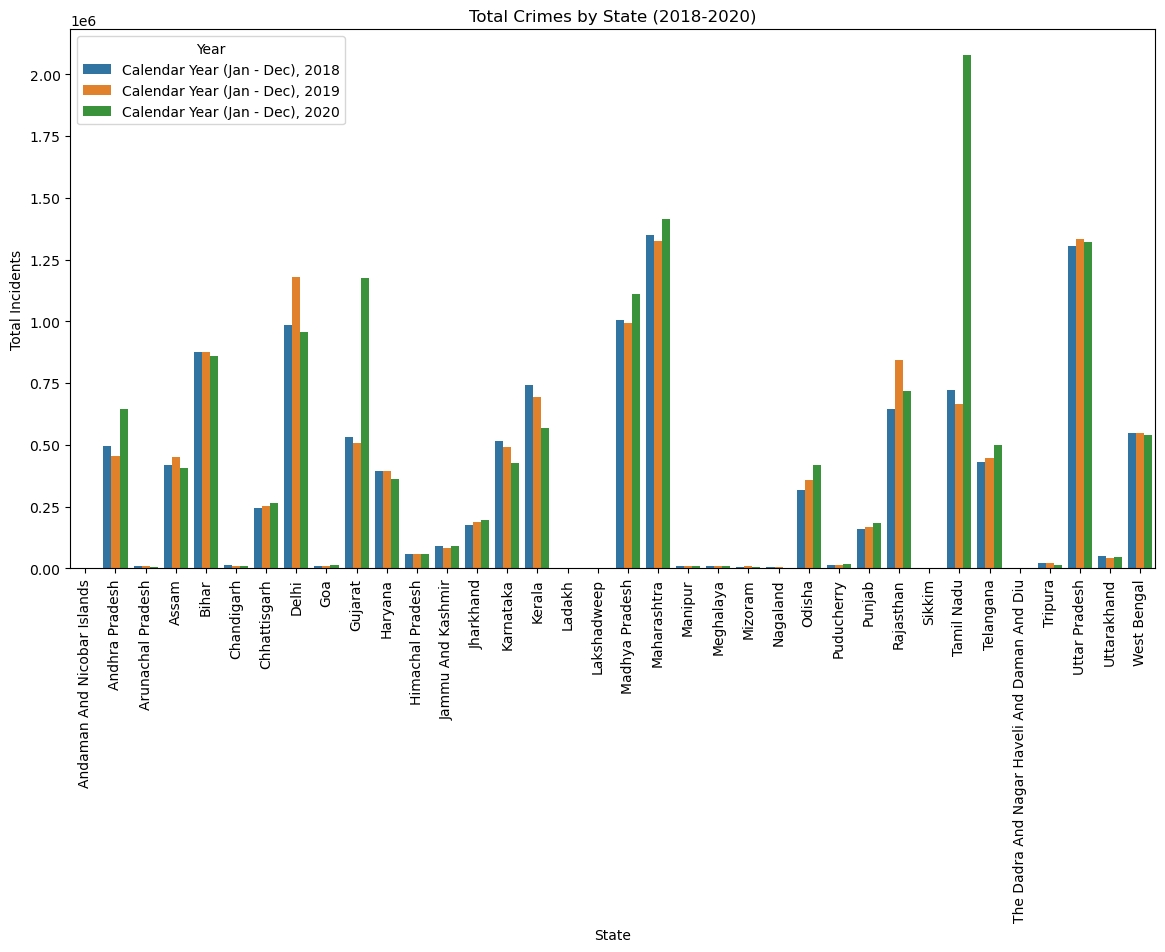

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate data by state and year
state_year_crimes = crime_data.groupby(['State', 'Year']).sum().reset_index()

# Bar plot of total crimes by state
plt.figure(figsize=(14, 7))
sns.barplot(x='State', y='Incidence Of Ipc ( Indian Penal Code ) Crimes (UOM:Number)', hue='Year', data=state_year_crimes)
plt.title('Total Crimes by State (2018-2020)')
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Total Incidents')
plt.legend(title='Year')
plt.show()


             State  Incidence Of Ipc ( Indian Penal Code ) Crimes (UOM:Number)
19     Maharashtra                                          4091502.0         
33   Uttar Pradesh                                          3958040.0         
29      Tamil Nadu                                          3465624.0         
7            Delhi                                          3120529.0         
18  Madhya Pradesh                                          3108302.0         
4            Bihar                                          2611837.0         
9          Gujarat                                          2217243.0         
27       Rajasthan                                          2205201.0         
15          Kerala                                          2003324.0         
35     West Bengal                                          1640564.0         


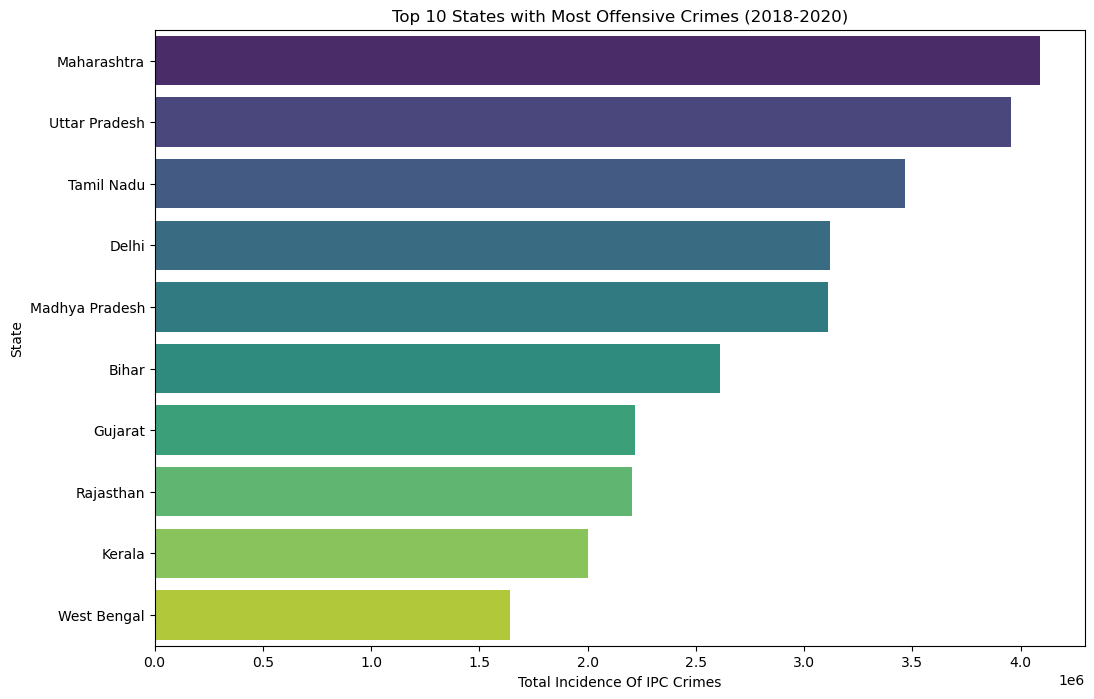

In [11]:
# Aggregate data by state
state_crimes_total = crime_data.groupby('State')['Incidence Of Ipc ( Indian Penal Code ) Crimes (UOM:Number)'].sum().reset_index()

# Sort the states by the total number of crimes in descending order
top_10_states = state_crimes_total.sort_values(by='Incidence Of Ipc ( Indian Penal Code ) Crimes (UOM:Number)', ascending=False).head(10)

# Print the top 10 states with the most offensive crimes
print(top_10_states)

# Visualization
plt.figure(figsize=(12, 8))
sns.barplot(x='Incidence Of Ipc ( Indian Penal Code ) Crimes (UOM:Number)', y='State', data=top_10_states, palette='viridis')
plt.title('Top 10 States with Most Offensive Crimes (2018-2020)')
plt.xlabel('Total Incidence Of IPC Crimes')
plt.ylabel('State')
plt.show()


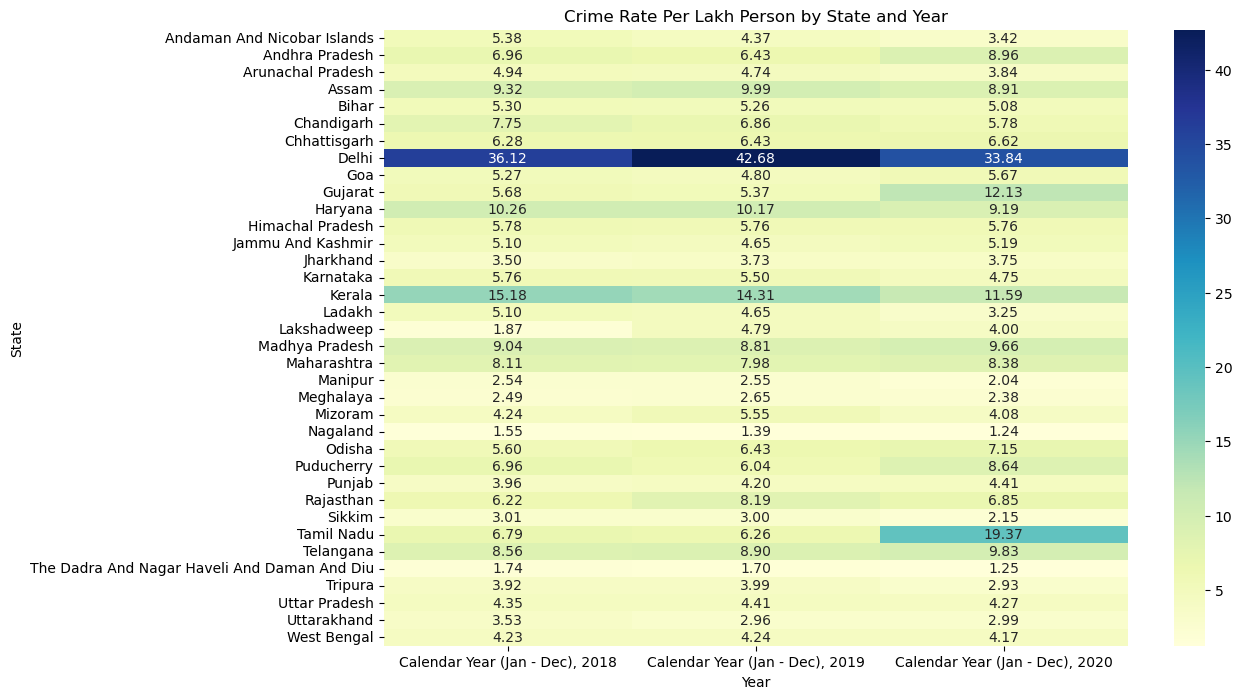

In [12]:
# Pivot data for heat map
crime_pivot = crime_data.pivot_table(index='State', columns='Year', values='Ipc ( Indian Penal Code ) Crime Rate Per Lakh Person (UOM:PerLakh(100000))')

# Heat map
plt.figure(figsize=(12, 8))
sns.heatmap(crime_pivot, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Crime Rate Per Lakh Person by State and Year')
plt.show()


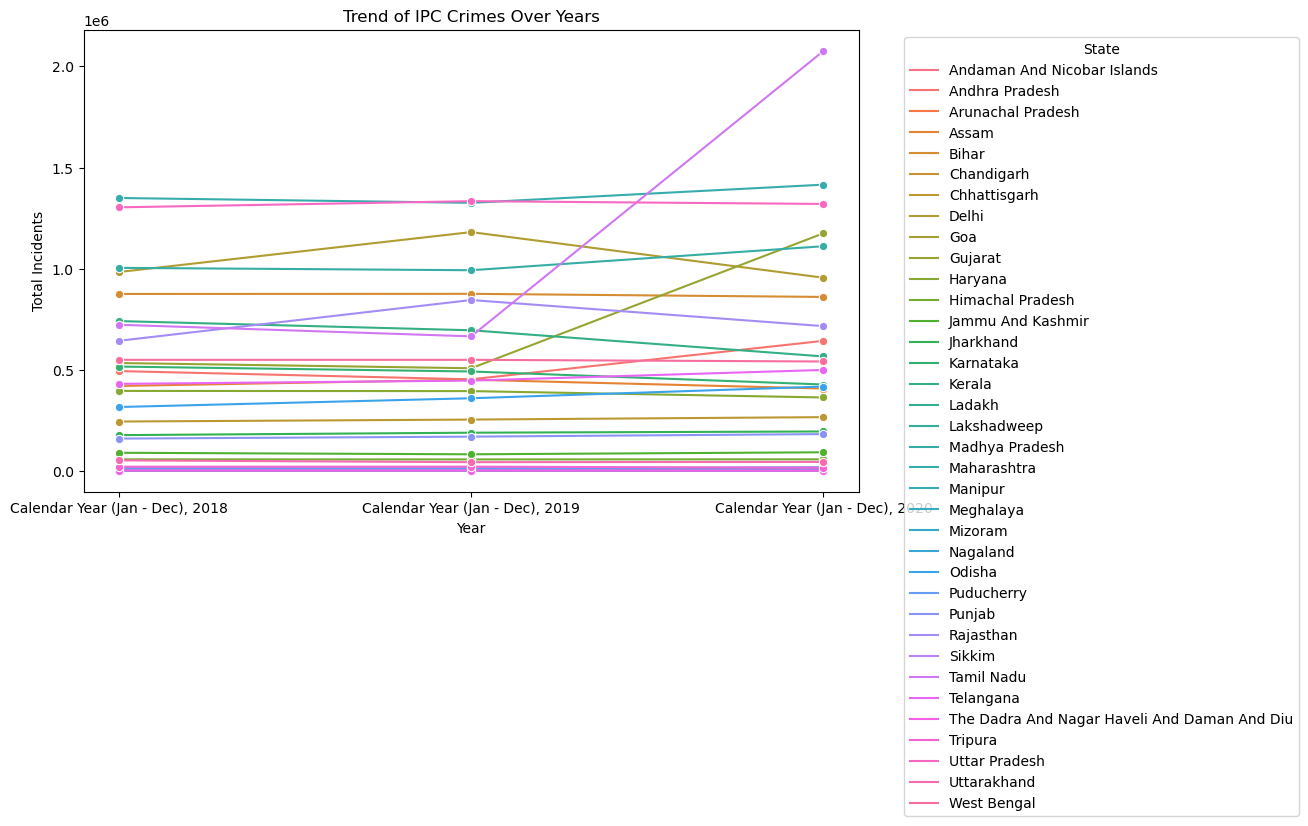

In [13]:
# Line graph for temporal trends
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Incidence Of Ipc ( Indian Penal Code ) Crimes (UOM:Number)', data=state_year_crimes, hue='State', marker='o')
plt.title('Trend of IPC Crimes Over Years')
plt.xlabel('Year')
plt.ylabel('Total Incidents')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


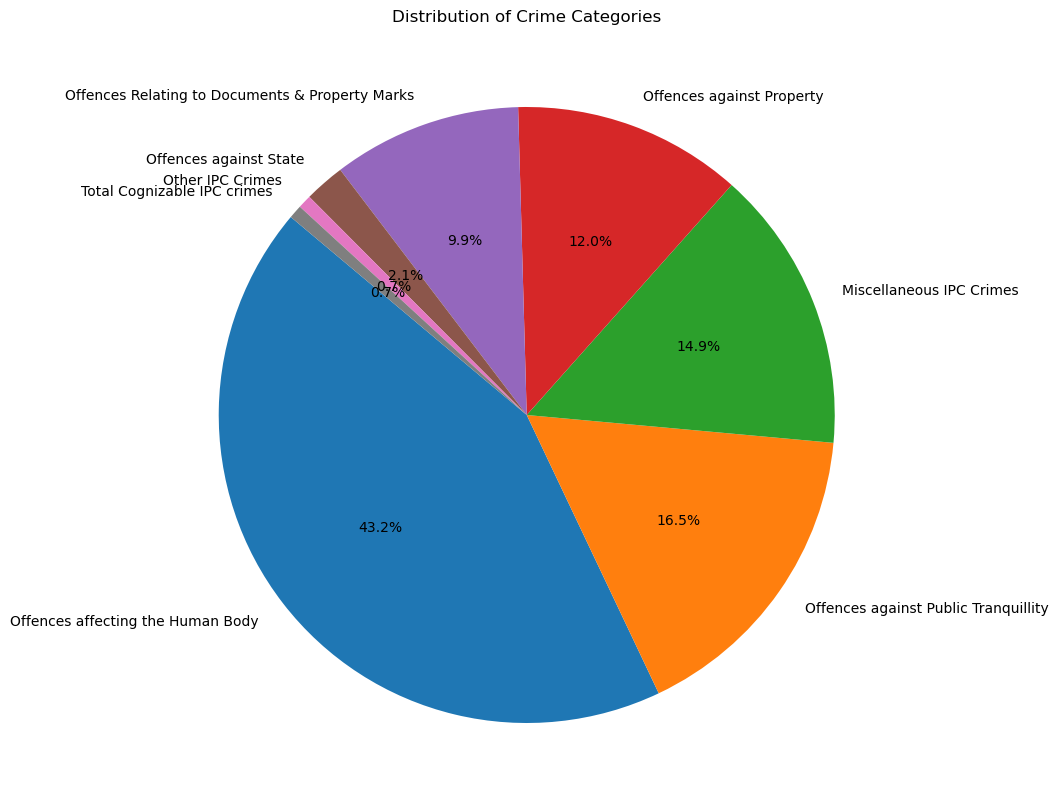

In [17]:
# Distribution of crime categories
category_distribution = crime_data['Crime Head Ipc ( Indian Penal Code ) Category'].value_counts()

# Pie chart for crime category distribution
plt.figure(figsize=(10, 10))
plt.pie(category_distribution, labels=category_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Crime Categories')
plt.show()


<Figure size 2000x3000 with 0 Axes>

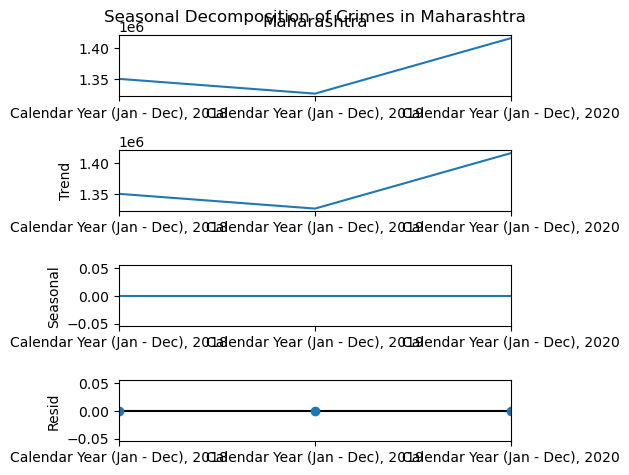

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Aggregate data by year and state
state_crimes = crime_data.groupby(['Year', 'State'])['Incidence Of Ipc ( Indian Penal Code ) Crimes (UOM:Number)'].sum().reset_index()
state_crimes_pivot = state_crimes.pivot(index='Year', columns='State', values='Incidence Of Ipc ( Indian Penal Code ) Crimes (UOM:Number)')

# Decompose the time series for a major state (e.g., Maharashtra)
state = 'Maharashtra'  # Example state
state_series = state_crimes_pivot[state].dropna()

plt.figure(figsize=(20, 30))
decomposition = seasonal_decompose(state_series, model='additive', period=1)
decomposition.plot()
plt.suptitle(f'Seasonal Decomposition of Crimes in {state}')
plt.show()


Forecasting for Maharashtra
Forecasting for Uttar Pradesh
Forecasting for Tamil Nadu
Forecasting for Delhi
Forecasting for Madhya Pradesh
Forecasting for Bihar
Forecasting for Gujarat
Forecasting for Rajasthan
Forecasting for Kerala
Forecasting for West Bengal


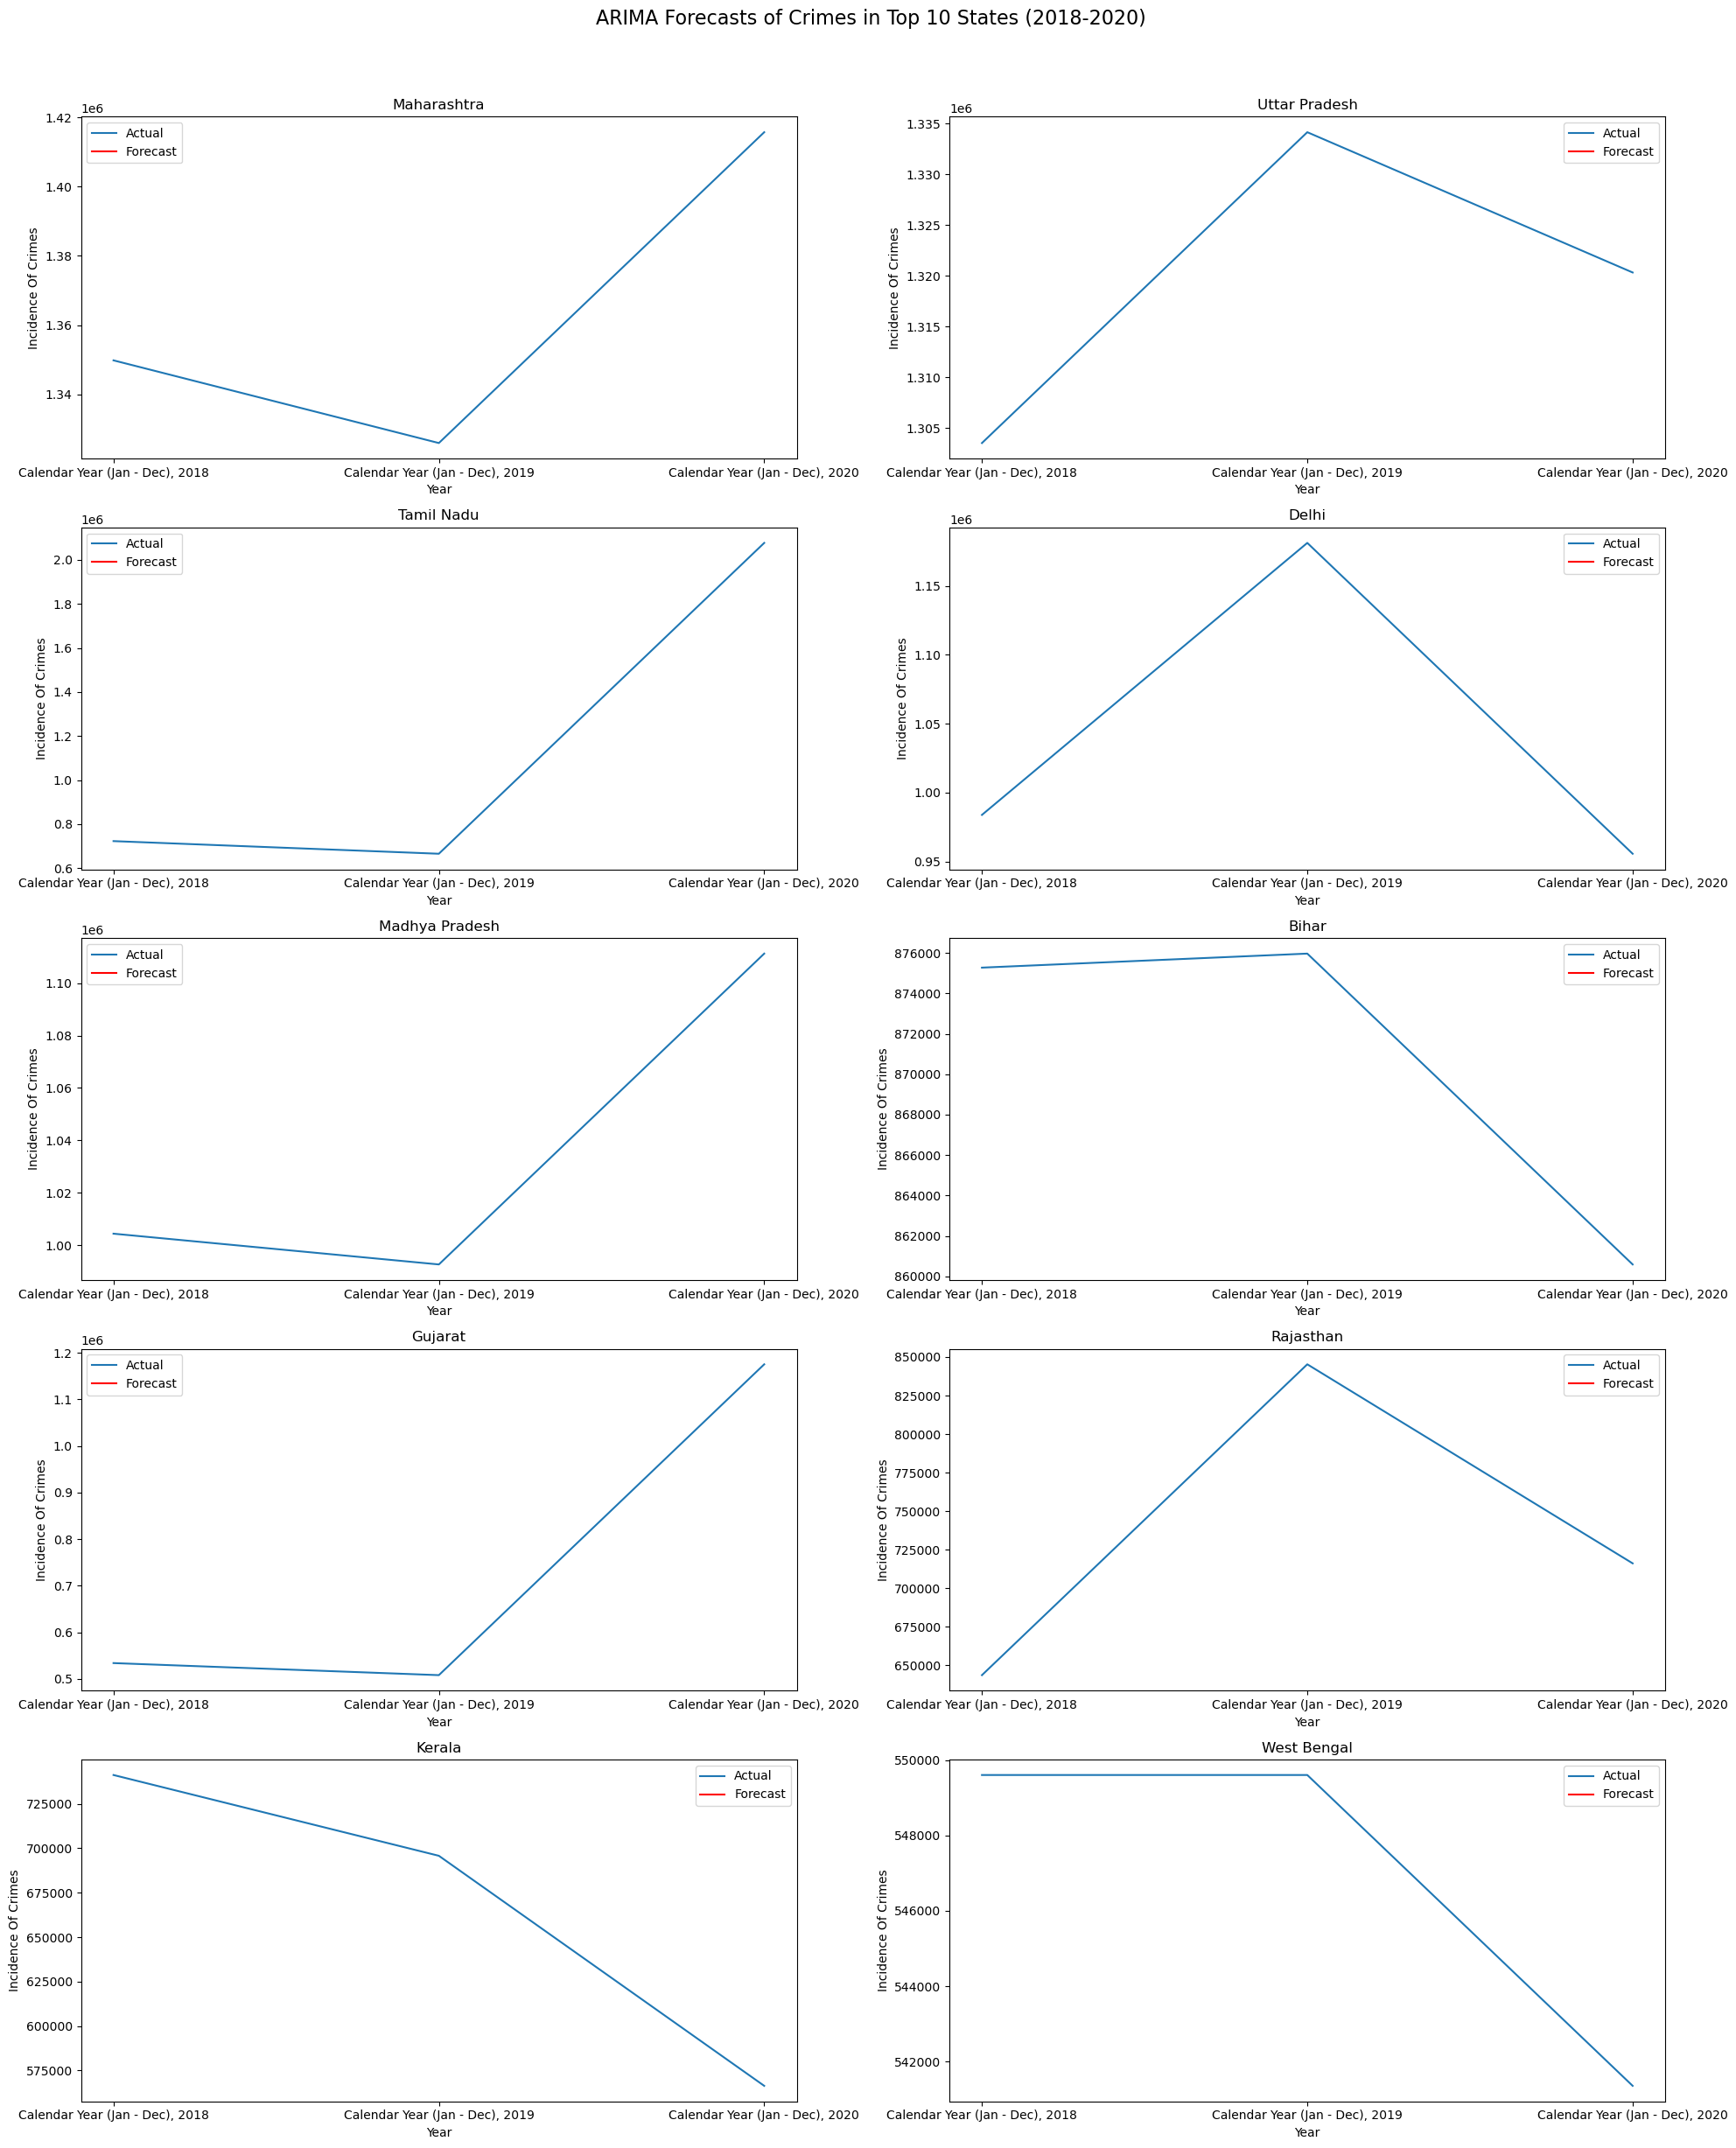

In [20]:
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.arima.model import ARIMA



# Function to fit ARIMA model and forecast
def forecast_crimes(state):
    state_crimes = crime_data[crime_data['State'] == state]
    state_crimes = state_crimes.groupby('Year')['Incidence Of Ipc ( Indian Penal Code ) Crimes (UOM:Number)'].sum().reset_index()
    state_crimes.set_index('Year', inplace=True)
    
    model = ARIMA(state_crimes, order=(1, 1, 1))
    model_fit = model.fit()
    
    forecast = model_fit.forecast(steps=3)
    
    return state_crimes, forecast

# Prepare to plot in a 5x2 grid
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 25))
fig.suptitle('ARIMA Forecasts of Crimes in Top 10 States (2018-2020)', fontsize=16)
axes = axes.flatten()

# Loop through top 10 states and forecast crimes
forecasts = {}
for i, state in enumerate(top_10_states['State']):
    print(f'Forecasting for {state}')
    actual, forecast = forecast_crimes(state)
    forecasts[state] = forecast

    # Plot actual vs forecasted values
    axes[i].plot(actual, label='Actual')
    axes[i].plot(pd.Series(forecast, index=[2021, 2022, 2023]), label='Forecast', color='red')
    axes[i].set_title(f'{state}')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Incidence Of Crimes')
    axes[i].legend()

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

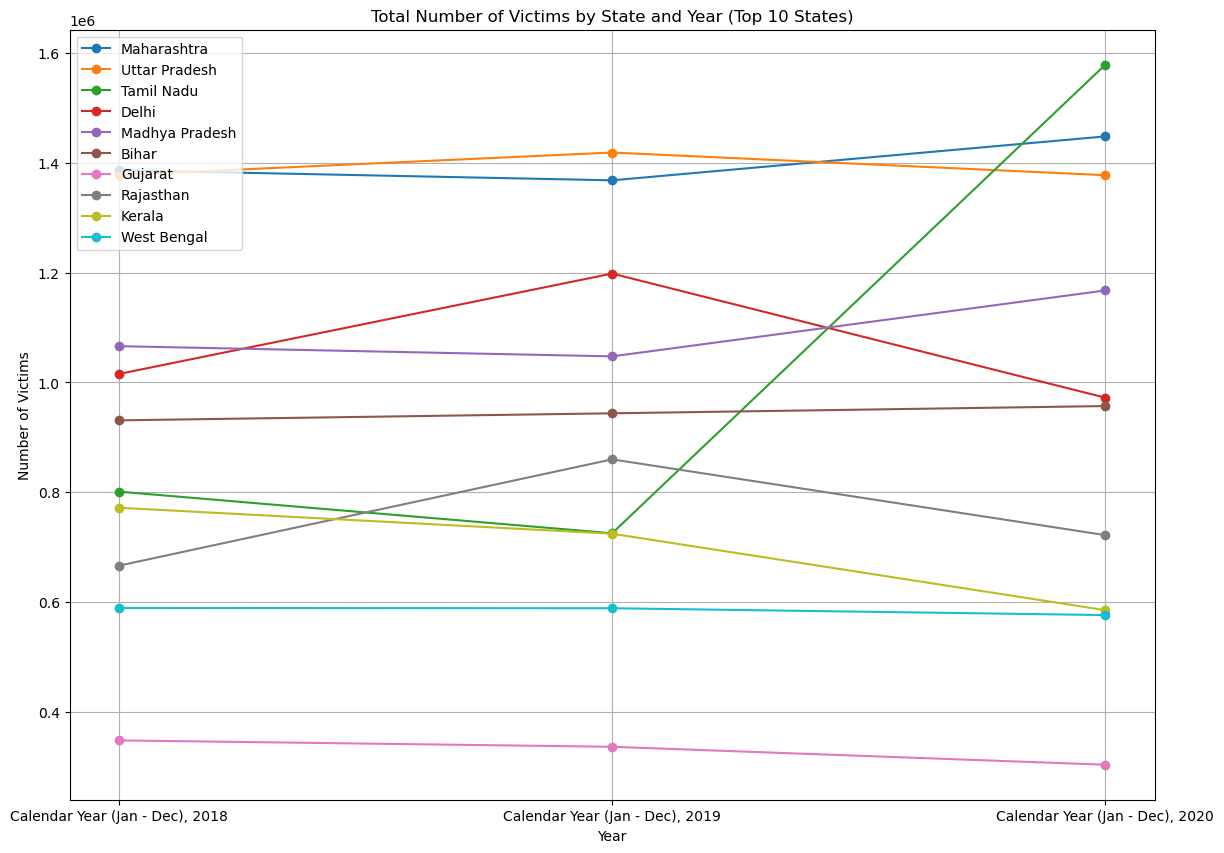

In [22]:
plt.figure(figsize=(14, 10))
for state in top_10_states['State']:
    state_data = crime_data[crime_data['State'] == state]
    yearly_victims = state_data.groupby('Year')['Victims Of Ipc ( Indian Penal Code ) Crimes (UOM:Number)'].sum().reset_index()
    plt.plot(yearly_victims['Year'], yearly_victims['Victims Of Ipc ( Indian Penal Code ) Crimes (UOM:Number)'], marker='o', label=state)

plt.title('Total Number of Victims by State and Year (Top 10 States)')
plt.xlabel('Year')
plt.ylabel('Number of Victims')
plt.legend()
plt.grid(True)
plt.show()


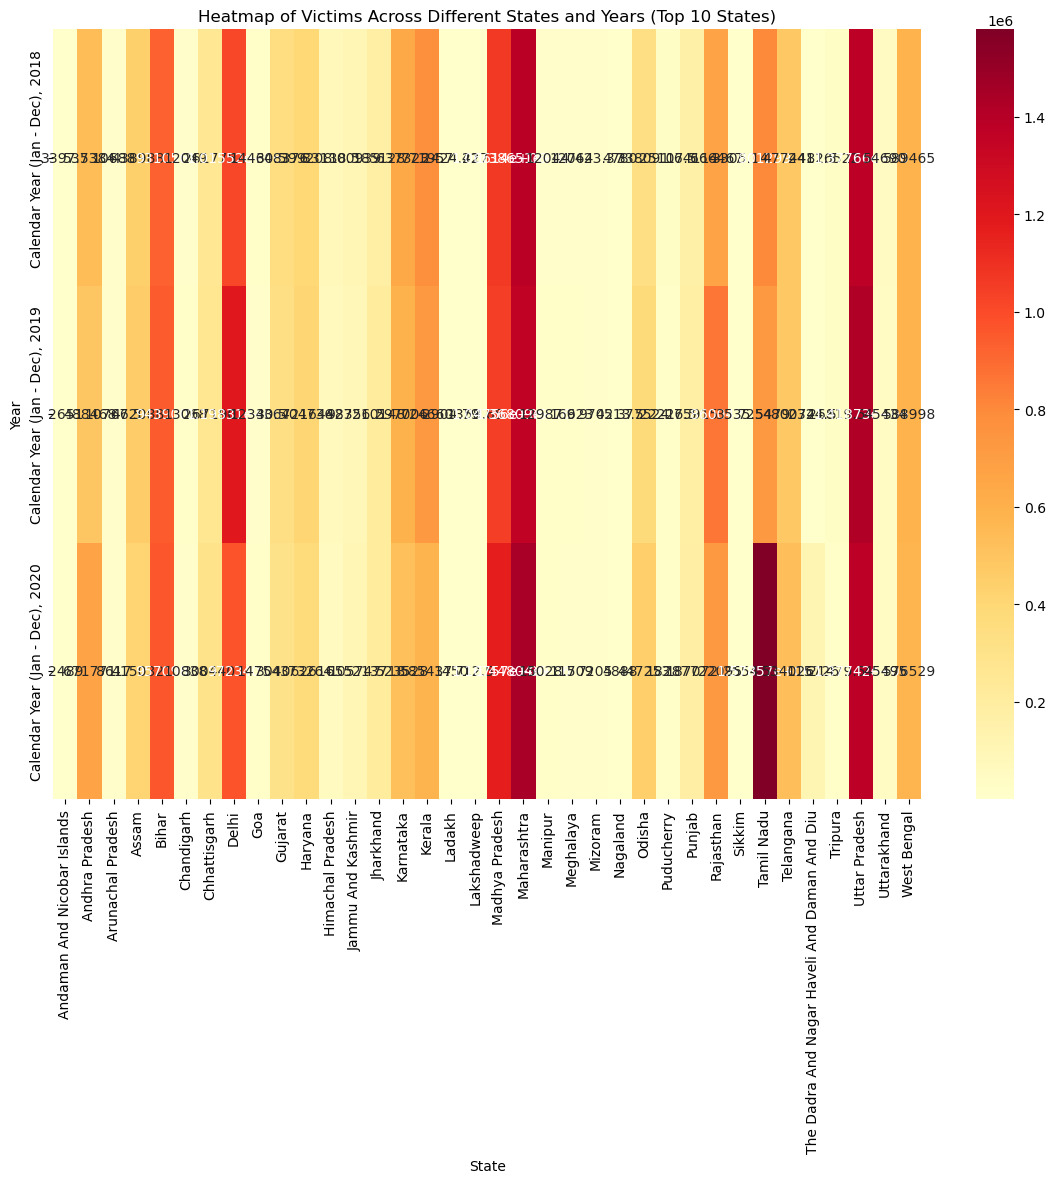

In [25]:
pivot_table = crime_data.pivot_table(index='Year', columns='State', values='Victims Of Ipc ( Indian Penal Code ) Crimes (UOM:Number)', aggfunc='sum')

plt.figure(figsize=(14, 10))
sns.heatmap(pivot_table, annot=True, cmap='YlOrRd', fmt='g')
plt.title('Heatmap of Victims Across Different States and Years (Top 10 States)')
plt.xlabel('State')
plt.ylabel('Year')
plt.show()


Correlation between Incidence of IPC Crimes and Number of Victims: 0.9704964669831923


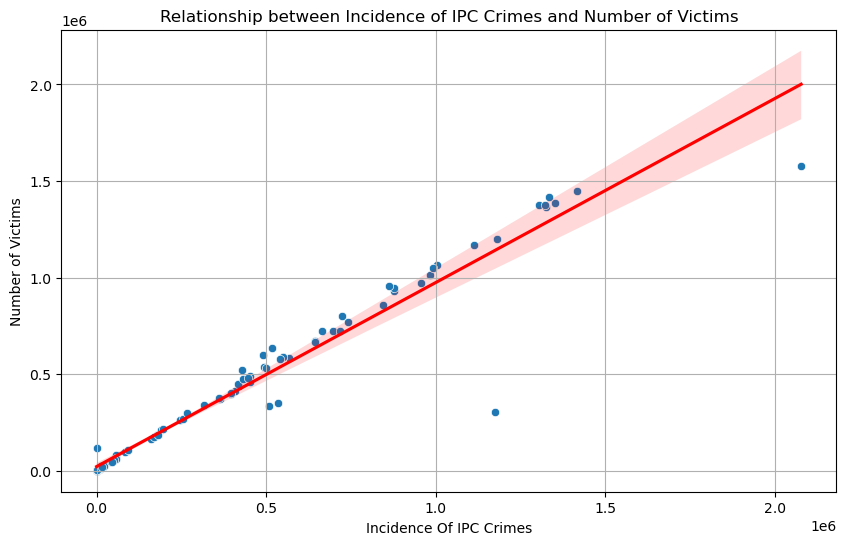

In [28]:
# Aggregate data by state and year
agg_data = crime_data.groupby(['State', 'Year']).sum().reset_index()

# Calculate correlation
correlation = agg_data['Incidence Of Ipc ( Indian Penal Code ) Crimes (UOM:Number)'].corr(agg_data['Victims Of Ipc ( Indian Penal Code ) Crimes (UOM:Number)'])
print(f'Correlation between Incidence of IPC Crimes and Number of Victims: {correlation}')

# Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Incidence Of Ipc ( Indian Penal Code ) Crimes (UOM:Number)', y='Victims Of Ipc ( Indian Penal Code ) Crimes (UOM:Number)', data=agg_data)
sns.regplot(x='Incidence Of Ipc ( Indian Penal Code ) Crimes (UOM:Number)', y='Victims Of Ipc ( Indian Penal Code ) Crimes (UOM:Number)', data=agg_data, scatter=False, color='red')
plt.title('Relationship between Incidence of IPC Crimes and Number of Victims')
plt.xlabel('Incidence Of IPC Crimes')
plt.ylabel('Number of Victims')
plt.grid(True)
plt.show()